<a href="https://colab.research.google.com/github/maariasa/AnaliticaDatos/blob/master/Ejercicio_ANN_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA REDES NEURONALES**

1. Hacer MLP y hacer regresión de Housing
2. Crear red secuencial propia
3. Deep learning, con la esta de modelo secuencial
4. Buscar funciones de activación además de las vistas.

X - Si se ponen + neuronas y + capas, que pasará? //No se si esto entra en la tarea



In [1]:
#Instalación TensorFlow y Keras
!pip install tensorflow==2.0.0-alpha0
!pip install keras

     |████████████████████████████████| 79.9MB 48kB/s 
     |████████████████████████████████| 3.0MB 49.7MB/s 
     |████████████████████████████████| 419kB 49.2MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [7]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#from sklearn.metrics import mean_absolute_error
#from sklearn.pipeline import Pipeline

%matplotlib inline

#Importar archivos desde el Drive
#Acceso a google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Acceso a la base de datos housing.csv
file_id = '18k2MeSKGGHx-plzA0sjOHQAmU6Omv454'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('housing.csv')


#Acceso a funciones_housing
file_id2 = '19LJ2nCoxLRTRnNfmrnF5VOJMF0wgZXzj'
downloaded = drive.CreateFile({'id': file_id2})
downloaded.GetContentFile('funciones_housing.py') 

from funciones_housing import pre_exploratorio, dummy_transformer

#Muestra datos de la base de datos
csv_path = 'housing.csv'
Xdata = pd.read_csv(csv_path)
Xdata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
#En redes son numpy o tensor
#NOTA: Tener cuidado con la version de TensorFlow (deberia ser 2.1; pero en colab está en 1.0)
#Los pesos de la red deben arrancar de manera aleatoria

Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
X_validacion , X_train = train_test_split(Xtrain, test_size=0.3)
col_sal = "median_house_value"
ytrain = X_train[col_sal]
ytest = Xtest[col_sal]
yvalid = X_validacion[col_sal]
X_train.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)
X_validacion.drop(columns=col_sal,inplace=True)

moda = SimpleImputer(strategy="most_frequent")
preproceso = dummy_transformer()
nor = StandardScaler()

ytrain = moda.fit_transform(pd.DataFrame(ytrain)) #Most frequent == moda
yvalid = moda.fit_transform(pd.DataFrame(yvalid))
ytest = moda.fit_transform(pd.DataFrame(ytest))


Xtrain_pre = preproceso.fit_transform(X_train)
X_validacion = nor.transform(X_validacion)

Xtest = preproceso.transform(Xtest)
Xtest = nor.transform(Xtest)

#Xtrain_pre = dummy_transformer().fit_transform(X_train)
#pre_exploratorio(Xtrain_pre,ytrain,col_sal)


NotFittedError: ignored

In [0]:
#X_train_full = Xdata
X_train = Xtrain_pre
X_train.shape
#X_train_full.head()


(4335, 9)

In [0]:
type(X_train_full)


pandas.core.frame.DataFrame

# Construcción Modelo

In [0]:
#Division en conjunto de validación, usar train_test_split
#X_validacion , X_train = train_test_split(X_train_full, test_size=0.3) #
#Y_validacion, Y_train = train_test_split(ytrain, test_size=0.3)

In [0]:
#Creacion modelo/arquitectura de la red. NOTA: Se necesita un input_shape[] para su construcción
#Funciona sin softmax como función de activación; y con neuronas de 500002+ de salida
modelo = keras.models.Sequential([
                                  #keras.layers.Flatten(input_shape=[9]), Flatten no se necesita utilizar acá, porque ya es un vector!!!
                                  keras.layers.Dense(300, input_shape=(9,), activation="relu"), #ENTRADA: 9 Caracteristicas; le llegan 9 "flechitas" a las 200 neuronas de "entrada"
                                  keras.layers.Dense(100, activation="tanh"), #Siguiente capa
                                  keras.layers.Dense(1) #No utilizar/necesita una funcion de activación; 1 valor unico; NO SE DEBE MOVER EL NUMERO!!!!
])

In [0]:
modelo.summary()
#Forma alterna de mostrar el MLP => keras.utils.plot_model(modelo, "xxx.png", show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 300)               3000      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 33,201
Trainable params: 33,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Acceso a los pesos y las neuronas de sesgo
capa_escondida = modelo.layers[1]
pesos, sesgos = capa_escondida.get_weights()

In [0]:
pesos
#pesos.shape

array([[ 0.0380336 , -0.06107577,  0.09383943, ...,  0.11340884,
        -0.10072464,  0.11657473],
       [-0.09780759, -0.0206321 ,  0.0972221 , ..., -0.0086491 ,
        -0.00313479, -0.04348452],
       [-0.11468484,  0.08386488,  0.04914541, ...,  0.0321111 ,
         0.1141644 ,  0.11062636],
       ...,
       [-0.01576693,  0.10911303, -0.00605413, ..., -0.09107102,
        -0.03342018, -0.08445571],
       [-0.06199449,  0.0445131 ,  0.02283651, ..., -0.02800202,
        -0.02898636,  0.04568534],
       [ 0.0071504 ,  0.06895535,  0.11092257, ...,  0.03704523,
         0.06031177,  0.11813969]], dtype=float32)

In [0]:
sesgos
#sesgos.shape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [0]:
#Compila el modelo para tener preparado para el entrenamiento
#Para ver mas formas de optimizacion mirar tf.keras.optimizers
#loss = funcion objetivo; para ver mas buscar tf.losses
#La tarea es mirar si es regresion o clasificacion
modelo.compile(loss=keras.losses.mse, #Si se esta en regresion aca se usa MSE (Minimum Square); NO SE DEBE USAR ACCURACY/Sparse Categorical Crossentropy, PORQUE ES CLASIFICACIÓN, SE BUSCA REGRESIÓN!!!!
               optimizer="sgd", #Como lo va a optimizar, por ahora se puede dejar asi por defecto
               metrics=[keras.losses.mae]) #No usar accuracy Y TENER CUIDADO CON LO QUE SE PONE! Si no se le puede ingresar algo que no tiene sentido a la red


In [0]:
X_validacion.shape

(10113, 9)

In [0]:
#EPOCA: #DATOS SOBRE EL TAMAÑO DEL LOTE
history = modelo.fit(X_train, Y_train, epochs=10, #En GS solo habia una particion; datos de entrada ya normalizados; usando 60 epocas no mejoró en nada
                    validation_data=(X_validacion, yvalid)) 

#Da la opción de guardar todos los modelos, promediarlos, o solo el mejor modelo (en forma de archivo .h5), importante en Big Data

Train on 4335 samples, validate on 10113 samples
Epoch 1/10
3872/4335 [=========================>....] - ETA: 0s - loss: 14322387811.4380 - mean_absolute_error: 94118.1719

ValueError: ignored

In [0]:
print(history.epoch)
history.params

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


{'batch_size': 32,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 4335,
 'steps': None,
 'verbose': 0}

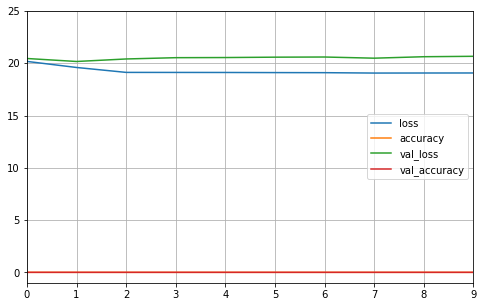

In [0]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-1,25)
plt.show()

In [0]:
modelo.evaluate(Xtest, ytest)

ValueError: ignored